In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np
from scipy import stats
import os, warnings
warnings.filterwarnings(action='ignore')

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd

train = pd.read_csv("data/train_df_jm.csv")
test = pd.read_csv("data/test_df_jm.csv")
sub = pd.read_csv("data/sample_submission.csv")
age = pd.read_csv("data/age_gender_info.csv")
train.shape, test.shape, sub.shape, age.shape

((2869, 15), (1008, 14), (150, 2), (16, 23))

In [4]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [5]:
train.head(30)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
5,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
6,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0


In [6]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수']

## Age 정보 추가

In [7]:
len(test['단지코드'].unique())

147

((array([-3.48993426, -3.24543014, -3.11017715, ...,  3.11017715,
          3.24543014,  3.48993426]),
  array([2.56494936, 2.56494936, 2.56494936, ..., 7.84384864, 7.84384864,
         7.84384864])),
 (0.8805142620262187, 5.974051234508852, 0.9839921058038086))

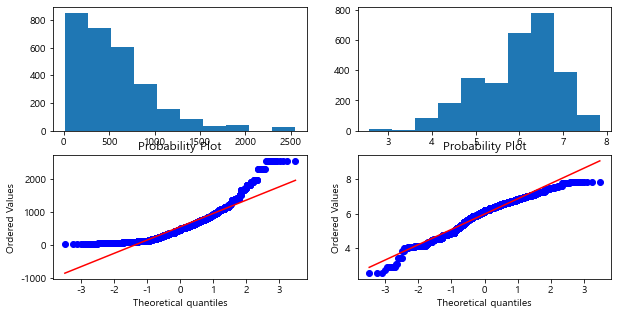

In [8]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(train['등록차량수'])
ax[0][1].hist(np.log(train['등록차량수']))

stats.probplot(train['등록차량수'], plot=ax[1][0])
stats.probplot(np.log(train['등록차량수']), plot=ax[1][1])

In [9]:
all_df = pd.concat([train, test], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
all_df
all_df.shape

(3877, 14)

In [10]:
all_df.shape

(3877, 14)

## 결측치 처리

### 자격유형

In [11]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
dtype: int64

In [12]:
all_df.loc[all_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
3065,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
3127,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [13]:
grouped = all_df.groupby(['단지코드', '임대건물구분', '지역','공급유형'])
group1 = grouped.get_group( ('C2411', '아파트', '경상남도', '국민임대')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
3062,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0
3063,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0
3064,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0
3065,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
3066,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0


In [14]:
group2 = grouped.get_group( ('C2253', '아파트', '강원도', '영구임대')  )
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
3127,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0
3128,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0
3129,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0


In [38]:
all_df.loc[ 3065, "자격유형"] = 'A'
all_df.loc[ 3127, "자격유형"] = 'C'

In [39]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
dtype: int64

### 임대보증금

In [40]:
print(all_df[all_df['임대보증금']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대보증금']=='-','임대보증금'] = 0
print('변경후')
print(all_df[all_df['임대보증금']=='-'].shape)

(0, 14)
변경후
(0, 14)


In [41]:
#일단 Nan 0으로 처리
print(all_df['임대보증금'].isnull().sum())
all_df['임대보증금'] = all_df['임대보증금'].fillna(0)
print('변경후')
print(all_df['임대보증금'].isnull().sum())

0
변경후
0


### 임대료

In [42]:
print(all_df[all_df['임대료']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대료']=='-','임대료'] = 0
print('변경후')
print(all_df[all_df['임대료']=='-'].shape)

(0, 14)
변경후
(0, 14)


In [43]:
#일단 Nan 0으로 처리
print(all_df['임대료'].isnull().sum())
all_df['임대료'] = all_df['임대료'].fillna(0)
print('변경후')
print(all_df['임대료'].isnull().sum())

0
변경후
0


In [44]:
all_df['임대료'] = all_df['임대료'].astype(int)
all_df['임대보증금'] = all_df['임대보증금'].astype(int)

In [45]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3877 non-null   object 
 1   총세대수        3877 non-null   int64  
 2   임대건물구분      3877 non-null   object 
 3   지역          3877 non-null   object 
 4   공급유형        3877 non-null   object 
 5   전용면적        3877 non-null   float64
 6   전용면적별세대수    3877 non-null   int64  
 7   공가수         3877 non-null   float64
 8   자격유형        3877 non-null   object 
 9   임대보증금       3877 non-null   int32  
 10  임대료         3877 non-null   int32  
 11  10분내지하철수    3877 non-null   float64
 12  10분내버스정류장수  3877 non-null   float64
 13  단지내주차면수     3877 non-null   float64
dtypes: float64(5), int32(2), int64(2), object(5)
memory usage: 393.9+ KB


### 10분내 지하철 수

In [46]:
#일단 Nan 0으로 처리
print(all_df['10분내지하철수'].isnull().sum())
all_df['10분내지하철수'] = all_df['10분내지하철수'].fillna(0)
print('변경후')
print(all_df['10분내지하철수'].isnull().sum())

0
변경후
0


In [47]:
# sub_tn = pd.read_csv("data/train(subway).csv")
# sub_tt = pd.read_csv("data/test(subway).csv")

In [48]:
# all_sub_df = pd.concat([sub_tn['지하철수'], sub_tt['지하철수']], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
# all_sub_df.shape

In [49]:
# all_df['10분내지하철수'] = all_sub_df

In [50]:
# all_df.head()

In [51]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
dtype: int64

In [52]:
all_df.corr()['10분내버스정류장수']

총세대수         -0.001356
전용면적          0.002800
전용면적별세대수      0.040957
공가수           0.038177
임대보증금         0.124743
임대료           0.084311
10분내지하철수      0.057391
10분내버스정류장수    1.000000
단지내주차면수       0.102414
Name: 10분내버스정류장수, dtype: float64

In [53]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,C2225,1206,아파트,경상남도,행복주택,26.17,120,49.0,K,51961000,27060,0.0,3.0,842.0,448.0
2773,C2225,1206,아파트,경상남도,행복주택,26.19,16,49.0,K,51961000,27060,0.0,3.0,842.0,448.0
2774,C2225,1206,아파트,경상남도,행복주택,36.03,290,49.0,K,72294000,37650,0.0,3.0,842.0,448.0
2775,C2225,1206,아파트,경상남도,행복주택,36.03,60,49.0,K,72294000,37650,0.0,3.0,842.0,448.0


In [54]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
val = group1['10분내버스정류장수'].mean()
val

4.011278195488722

In [55]:
# 데이터 확인 후, 처리
all_df.loc[ all_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = val

In [56]:
all_df.loc[ all_df['10분내버스정류장수'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수


In [57]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
dtype: int64

In [58]:
all_df.shape

(3877, 14)

# 라벨인코딩

In [59]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [60]:
all_df.head(100)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,4,0,0,0.0,2.0,97.0
96,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,4,0,0,0.0,2.0,97.0
97,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,4,0,0,0.0,2.0,97.0
98,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,4,0,0,0.0,2.0,97.0


In [61]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0,1,1,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,12,0,0,0.0,1.0,467.0,1,1,9
3873,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1
3874,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1
3875,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,8,13410000,144600,0.0,2.0,300.0,1,4,1


In [62]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes # category가 code로 변환된다.

### 전용면적을 구간화하기
all_df['전용면적별세대수'] = all_df['전용면적별세대수'].astype('float32')

# 전용면적, 공가수, 단지내주차면수
all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False) # 구간을 나눠서 보겠다. (총 세대수에 대해서 구간 분할 해 주기)
all_df.head(10)
all_df['qcut_총세대수'].unique()

array([1, 3, 2, 4, 0], dtype=int64)

# 전용면적별 세대의 합계와 총세대수가 일치하지 않는 오류
* 차이가 14세대 이하인 48개 단지 - ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']
* 차이가 94~452세대인 10개 단지(크기순) - ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]

#### 차이가 14세대 이하인 48개 단지 : 단지코드_Type =1

In [63]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1

In [64]:
all_df['단지코드_Type'].unique()

array([nan,  1.])

#### 차이가 94~452세대인 10개단지 처리하기 :  단지코드_Type =2

In [65]:
group2 = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']
for one2 in group2:
        all_df.loc[all_df['단지코드'] == one2, "단지코드_Type"] = 2

#### 그외 :  단지코드_Type =3

In [66]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

### 변수 추가

In [67]:
all_df['환산보증금'] = all_df['임대보증금'].astype(int)+(all_df['임대료'].astype(int)+100)
all_df['환산보증금']

0        9299040
1       12779230
2       12779230
3       18582860
4       18582860
          ...   
3872         100
3873     6978500
3874     6978500
3875    13554700
3876    18855600
Name: 환산보증금, Length: 3877, dtype: int32

In [68]:
all_df['주차면수대비총세대수비율'] = all_df['총세대수']/all_df['단지내주차면수']
all_df['거주율'] =1 - (all_df['공가수']/all_df['총세대수'])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([2.63905733, 2.63905733, 2.63905733, ..., 7.49498623, 7.49498623,
         7.49498623])),
 (0.7344105105721078, 6.126121425642588, 0.9868157045962277))

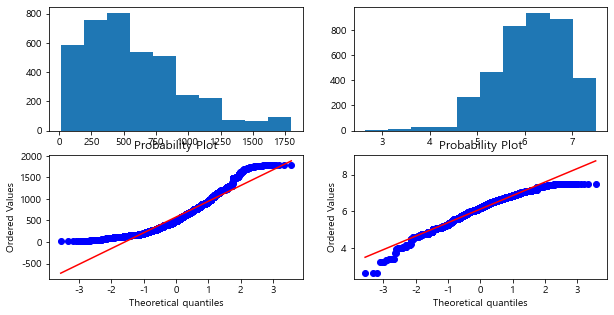

In [69]:
all_df['log_단지내주차면수'] = np.log1p(all_df['단지내주차면수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['단지내주차면수'])
ax[0][1].hist(all_df['log_단지내주차면수'])

stats.probplot(all_df['단지내주차면수'], plot=ax[1][0])
stats.probplot(all_df['log_단지내주차면수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([3.29583687, 3.29583687, 3.29583687, ..., 7.85282781, 7.85282781,
         7.85282781])),
 (0.6093767949475518, 6.611311889490474, 0.9883341683848889))

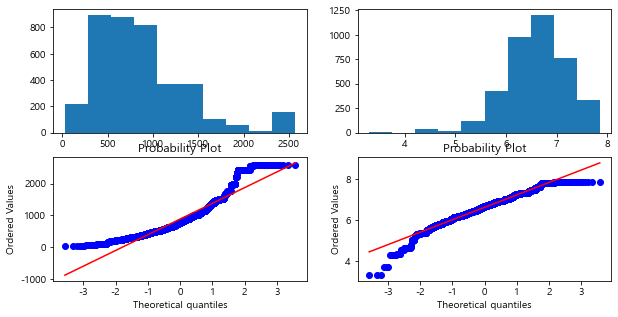

In [70]:
all_df['log_총세대수'] = np.log1p(all_df['총세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['총세대수'])
ax[0][1].hist(all_df['log_총세대수'])

stats.probplot(all_df['총세대수'], plot=ax[1][0])
stats.probplot(all_df['log_총세대수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([0.6931472, 0.6931472, 0.6931472, ..., 7.293698 , 7.3072023,
         7.5315523], dtype=float32)),
 (1.6307518283269595, 3.662091016769409, 0.9441208816516677))

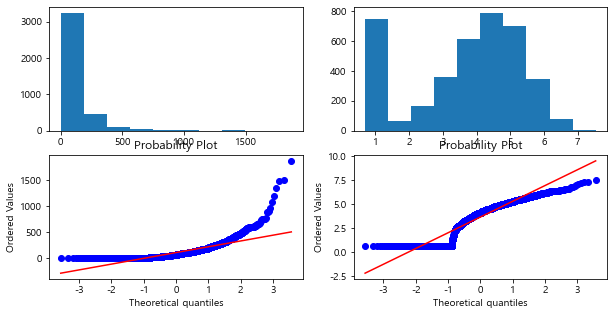

In [71]:
all_df['log_전용면적별세대수'] = np.log1p(all_df['전용면적별세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['전용면적별세대수'])
ax[0][1].hist(all_df['log_전용면적별세대수'])

stats.probplot(all_df['전용면적별세대수'], plot=ax[1][0])
stats.probplot(all_df['log_전용면적별세대수'], plot=ax[1][1])

(array([172., 260., 329., 272., 176., 579., 609., 774., 585., 121.]),
 array([0.        , 0.40253517, 0.80507034, 1.20760551, 1.61014068,
        2.01267585, 2.41521101, 2.81774618, 3.22028135, 3.62281652,
        4.02535169]),
 <BarContainer object of 10 artists>)

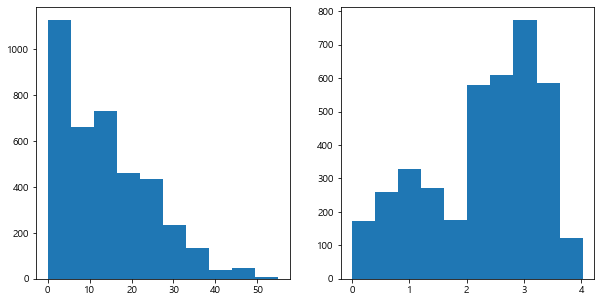

In [72]:
all_df['log_공가수'] = np.log1p(all_df['공가수'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(all_df['공가수'])
ax[1].hist(all_df['log_공가수'])

In [73]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,492,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1267,675,36.77,126.0,38.0,12,0,0,0.0,1.0,...,86,2,1.0,100,1.445396,0.943704,6.148468,6.516193,4.844187,3.663562
3873,C2189,382,29.19,96.0,45.0,8,6872000,106400,0.0,2.0,...,381,0,1.0,6978500,1.273333,0.882199,5.707110,5.948035,4.574711,3.828641
3874,C2189,382,29.19,20.0,45.0,8,6872000,106400,0.0,2.0,...,381,0,1.0,6978500,1.273333,0.882199,5.707110,5.948035,3.044523,3.828641
3875,C2189,382,39.45,202.0,45.0,8,13410000,144600,0.0,2.0,...,381,0,1.0,13554700,1.273333,0.882199,5.707110,5.948035,5.313206,3.828641


In [74]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   단지코드          3877 non-null   category
 1   총세대수          3877 non-null   int64   
 2   임대건물구분        3877 non-null   object  
 3   지역            3877 non-null   object  
 4   공급유형          3877 non-null   object  
 5   전용면적          3877 non-null   float64 
 6   전용면적별세대수      3877 non-null   float32 
 7   공가수           3877 non-null   float64 
 8   자격유형          3877 non-null   int32   
 9   임대보증금         3877 non-null   int32   
 10  임대료           3877 non-null   int32   
 11  10분내지하철수      3877 non-null   float64 
 12  10분내버스정류장수    3877 non-null   float64 
 13  단지내주차면수       3877 non-null   float64 
 14  임대건물구분_lbl    3877 non-null   int64   
 15  지역_lbl        3877 non-null   int64   
 16  공급유형_lbl      3877 non-null   int64   
 17  단지코드_lbl      3877 non-null   int16   
 18  qcut_총세대

In [75]:
# '총세대수' : 0.333440, '단지내주차면수' : 0.861338, 임대건물구분_lbl : -0.449130
# 전용면적    0.112717, 전용면적별세대수   0.250513, 공가수           0.118910,
# 자격유형         -0.154034, 공급유형_lbl     -0.137277

In [76]:
train.corr()['등록차량수']

총세대수          0.326923
전용면적          0.106366
전용면적별세대수      0.254948
공가수           0.130775
10분내지하철수     -0.101792
10분내버스정류장수    0.110977
단지내주차면수       0.856549
등록차량수         1.000000
Name: 등록차량수, dtype: float64

(array([3.245e+03, 4.700e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03], dtype=float32),
 <BarContainer object of 10 artists>)

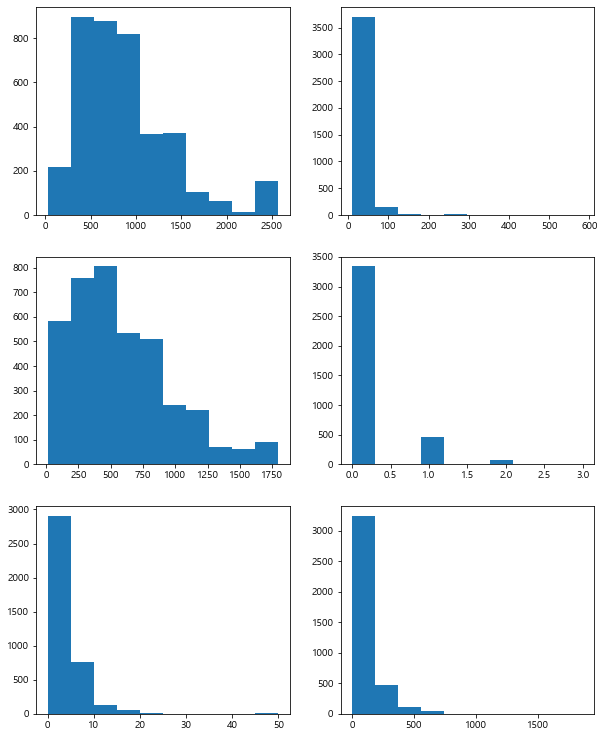

In [77]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13))

ax[0][0].hist(all_df_last['총세대수'])
ax[0][1].hist(all_df_last['전용면적'])
ax[1][0].hist(all_df_last['단지내주차면수'])
ax[1][1].hist(all_df_last['10분내지하철수'])
ax[2][0].hist(all_df_last['10분내버스정류장수'])
ax[2][1].hist(all_df_last['전용면적별세대수'])

# 원핫 인코딩

In [78]:
# print("dummy 수행 전 shape",all_df_last.shape)
# all_df_last_oh = pd.get_dummies(all_df_last)
# print("dummy 수행 후 shape",all_df_last_oh.shape)

In [79]:
train_df = all_df_last.iloc[0:2869,:]
test_df = all_df_last.iloc[2869:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,49.20,19.0,7.0,1,11346000,116090,0.0,1.0,...,0,3.0,11462190,1.439759,0.970711,5.117994,5.480639,2.995732,2.079442,146.0
2865,C2532,239,51.08,34.0,7.0,1,14005000,142310,0.0,1.0,...,0,3.0,14147410,1.439759,0.970711,5.117994,5.480639,3.555348,2.079442,146.0
2866,C2532,239,51.73,34.0,7.0,1,14005000,142310,0.0,1.0,...,0,3.0,14147410,1.439759,0.970711,5.117994,5.480639,3.555348,2.079442,146.0
2867,C2532,239,51.96,114.0,7.0,1,14005000,142310,0.0,1.0,...,0,3.0,14147410,1.439759,0.970711,5.117994,5.480639,4.744932,2.079442,146.0


In [80]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])

In [81]:
from sklearn.model_selection import train_test_split

print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])
print()
print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수            0.326923
전용면적            0.106366
전용면적별세대수        0.254948
공가수             0.130775
자격유형           -0.145695
임대보증금           0.412956
임대료             0.530381
10분내지하철수       -0.079587
10분내버스정류장수      0.110977
단지내주차면수         0.856549
임대건물구분_lbl     -0.449235
지역_lbl          0.044321
공급유형_lbl       -0.158484
단지코드_lbl       -0.097279
qcut_총세대수       0.391915
단지코드_Type       0.106931
환산보증금           0.414723
주차면수대비총세대수비율   -0.495788
거주율             0.181101
log_단지내주차면수     0.780551
log_총세대수        0.391253
log_전용면적별세대수    0.441152
log_공가수         0.194988
등록차량수           1.000000
log_등록차량수       0.880118
Name: 등록차량수, dtype: float64

log_등록차량수 상관계수 ;  총세대수            0.222139
전용면적            0.106791
전용면적별세대수        0.277025
공가수             0.209018
자격유형           -0.233354
임대보증금           0.457816
임대료             0.558854
10분내지하철수       -0.084091
10분내버스정류장수      0.084163
단지내주차면수         0.801934
임대건물구분_lbl     -0.596408
지역_lbl          0.100230
공급유형_lbl      

In [82]:
pd.set_option('display.min_rows',10)

In [83]:
train_df.head(30)

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,log_등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0,5.327876
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0,5.327876
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0,5.327876
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0,5.327876
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0,5.327876
5,C2515,545,51.97,106.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,4.672829,2.890372,205.0,5.327876
6,C2515,545,51.97,26.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,3.295837,2.890372,205.0,5.327876
7,C1407,1216,30.95,288.0,13.0,1,15620000,127350,1.0,1.0,...,3.0,15747450,0.946304,0.989309,7.159292,7.104144,5.666427,2.639057,1064.0,6.970730
8,C1407,1216,30.99,68.0,13.0,1,15620000,127350,1.0,1.0,...,3.0,15747450,0.946304,0.989309,7.159292,7.104144,4.234107,2.639057,1064.0,6.970730
9,C1407,1216,30.99,34.0,13.0,1,15620000,127350,1.0,1.0,...,3.0,15747450,0.946304,0.989309,7.159292,7.104144,3.555348,2.639057,1064.0,6.970730


In [84]:
train_df.shape

(2869, 26)

In [85]:
train_df.isnull().sum()

단지코드            0
총세대수            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금           0
임대료             0
10분내지하철수        0
10분내버스정류장수      0
단지내주차면수         0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
단지코드_Type       0
환산보증금           0
주차면수대비총세대수비율    0
거주율             0
log_단지내주차면수     0
log_총세대수        0
log_전용면적별세대수    0
log_공가수         0
등록차량수           0
log_등록차량수       0
dtype: int64

In [86]:
train_df.columns

Index(['단지코드', '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl',
       '단지코드_lbl', 'qcut_총세대수', '단지코드_Type', '환산보증금', '주차면수대비총세대수비율', '거주율',
       'log_단지내주차면수', 'log_총세대수', 'log_전용면적별세대수', 'log_공가수', '등록차량수',
       'log_등록차량수'],
      dtype='object')

In [88]:
# sel = ['log_총세대수', '전용면적', '공가수', 'log_단지내주차면수',
#        'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
#        '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
#        '단지코드_Type']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#        '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
#        '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
#        '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
#        '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#       '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

# 회귀 트리 모델 학습/예측/평가

In [89]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #교차검증
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error

In [90]:
# # 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
# def get_top_features(model):
#     ftr_importances_values = model.feature_importances_
#     ftr_importances = pd.Series(ftr_importances_values, index=X.columns  )
#     ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
#     return ftr_top20

# def visualize_ftr_importances(models):
#     # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
#     fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
#     fig.tight_layout() 
#     # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
#     for i_num, model in enumerate(models):
#         # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
#         ftr_top20 = get_top_features(model)
#         axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
#         #font 크기 조정.
#         for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
#             label.set_fontsize(22)
#         sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# # 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
# models = [best_xgb, best_lgbm, best_catm, best_catm]
# visualize_ftr_importances(models)

In [92]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error
def get_mae_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mae = mean_absolute_error(y_test , pred_value)
        print('{0} 모델의 MAE: {1}'.format(key, mae))

xgb_reg = XGBRegressor(n_estimators=5000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=5000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
catm_reg = CatBoostRegressor(n_estimators=5000, learning_rate=0.05 ,random_state= 0,verbose= 1,objective = "MAE")

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
catm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)
catm_pred = catm_reg.predict(X_test)


pred = 0.3 * xgb_pred + 0.3 * lgbm_pred + 0.4 * catm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred,
          'CATM' : catm_pred}
  
get_mae_pred(preds)

0:	learn: 0.6845700	total: 156ms	remaining: 13m 1s
1:	learn: 0.6574059	total: 169ms	remaining: 7m 2s
2:	learn: 0.6325645	total: 182ms	remaining: 5m 3s
3:	learn: 0.6094027	total: 195ms	remaining: 4m 3s
4:	learn: 0.5860494	total: 207ms	remaining: 3m 27s
5:	learn: 0.5635795	total: 221ms	remaining: 3m 3s
6:	learn: 0.5416431	total: 235ms	remaining: 2m 47s
7:	learn: 0.5237694	total: 247ms	remaining: 2m 34s
8:	learn: 0.5052538	total: 259ms	remaining: 2m 23s
9:	learn: 0.4876427	total: 272ms	remaining: 2m 15s
10:	learn: 0.4709318	total: 284ms	remaining: 2m 8s
11:	learn: 0.4559268	total: 296ms	remaining: 2m 3s
12:	learn: 0.4413564	total: 309ms	remaining: 1m 58s
13:	learn: 0.4277574	total: 321ms	remaining: 1m 54s
14:	learn: 0.4134151	total: 333ms	remaining: 1m 50s
15:	learn: 0.4013498	total: 349ms	remaining: 1m 48s
16:	learn: 0.3891410	total: 363ms	remaining: 1m 46s
17:	learn: 0.3777100	total: 380ms	remaining: 1m 45s
18:	learn: 0.3666461	total: 399ms	remaining: 1m 44s
19:	learn: 0.3557624	total: 

158:	learn: 0.1240183	total: 3.36s	remaining: 1m 42s
159:	learn: 0.1238932	total: 3.38s	remaining: 1m 42s
160:	learn: 0.1235063	total: 3.4s	remaining: 1m 42s
161:	learn: 0.1233618	total: 3.44s	remaining: 1m 42s
162:	learn: 0.1229507	total: 3.46s	remaining: 1m 42s
163:	learn: 0.1227654	total: 3.48s	remaining: 1m 42s
164:	learn: 0.1224658	total: 3.49s	remaining: 1m 42s
165:	learn: 0.1221247	total: 3.51s	remaining: 1m 42s
166:	learn: 0.1217764	total: 3.54s	remaining: 1m 42s
167:	learn: 0.1215485	total: 3.55s	remaining: 1m 42s
168:	learn: 0.1212643	total: 3.57s	remaining: 1m 42s
169:	learn: 0.1210022	total: 3.58s	remaining: 1m 41s
170:	learn: 0.1208114	total: 3.6s	remaining: 1m 41s
171:	learn: 0.1206023	total: 3.62s	remaining: 1m 41s
172:	learn: 0.1204801	total: 3.64s	remaining: 1m 41s
173:	learn: 0.1202148	total: 3.66s	remaining: 1m 41s
174:	learn: 0.1200929	total: 3.68s	remaining: 1m 41s
175:	learn: 0.1198186	total: 3.7s	remaining: 1m 41s
176:	learn: 0.1194513	total: 3.72s	remaining: 1m 

318:	learn: 0.0911643	total: 6.12s	remaining: 1m 29s
319:	learn: 0.0911158	total: 6.14s	remaining: 1m 29s
320:	learn: 0.0909745	total: 6.15s	remaining: 1m 29s
321:	learn: 0.0908947	total: 6.17s	remaining: 1m 29s
322:	learn: 0.0906602	total: 6.18s	remaining: 1m 29s
323:	learn: 0.0905451	total: 6.21s	remaining: 1m 29s
324:	learn: 0.0903829	total: 6.23s	remaining: 1m 29s
325:	learn: 0.0902956	total: 6.25s	remaining: 1m 29s
326:	learn: 0.0901634	total: 6.27s	remaining: 1m 29s
327:	learn: 0.0901032	total: 6.29s	remaining: 1m 29s
328:	learn: 0.0898026	total: 6.31s	remaining: 1m 29s
329:	learn: 0.0897607	total: 6.32s	remaining: 1m 29s
330:	learn: 0.0896468	total: 6.34s	remaining: 1m 29s
331:	learn: 0.0895324	total: 6.36s	remaining: 1m 29s
332:	learn: 0.0892047	total: 6.38s	remaining: 1m 29s
333:	learn: 0.0890845	total: 6.4s	remaining: 1m 29s
334:	learn: 0.0890283	total: 6.42s	remaining: 1m 29s
335:	learn: 0.0890126	total: 6.43s	remaining: 1m 29s
336:	learn: 0.0889201	total: 6.46s	remaining: 1

478:	learn: 0.0763173	total: 8.49s	remaining: 1m 20s
479:	learn: 0.0761312	total: 8.5s	remaining: 1m 20s
480:	learn: 0.0761237	total: 8.52s	remaining: 1m 20s
481:	learn: 0.0761123	total: 8.54s	remaining: 1m 20s
482:	learn: 0.0760156	total: 8.57s	remaining: 1m 20s
483:	learn: 0.0760011	total: 8.59s	remaining: 1m 20s
484:	learn: 0.0759804	total: 8.63s	remaining: 1m 20s
485:	learn: 0.0758491	total: 8.65s	remaining: 1m 20s
486:	learn: 0.0757972	total: 8.66s	remaining: 1m 20s
487:	learn: 0.0756540	total: 8.68s	remaining: 1m 20s
488:	learn: 0.0755440	total: 8.69s	remaining: 1m 20s
489:	learn: 0.0754636	total: 8.7s	remaining: 1m 20s
490:	learn: 0.0754550	total: 8.72s	remaining: 1m 20s
491:	learn: 0.0754363	total: 8.73s	remaining: 1m 19s
492:	learn: 0.0754133	total: 8.75s	remaining: 1m 19s
493:	learn: 0.0754029	total: 8.76s	remaining: 1m 19s
494:	learn: 0.0753171	total: 8.78s	remaining: 1m 19s
495:	learn: 0.0753093	total: 8.8s	remaining: 1m 19s
496:	learn: 0.0751894	total: 8.81s	remaining: 1m 

639:	learn: 0.0649477	total: 10.9s	remaining: 1m 14s
640:	learn: 0.0649315	total: 10.9s	remaining: 1m 14s
641:	learn: 0.0647173	total: 10.9s	remaining: 1m 14s
642:	learn: 0.0646201	total: 10.9s	remaining: 1m 14s
643:	learn: 0.0643669	total: 10.9s	remaining: 1m 14s
644:	learn: 0.0643321	total: 11s	remaining: 1m 13s
645:	learn: 0.0643047	total: 11s	remaining: 1m 13s
646:	learn: 0.0641444	total: 11s	remaining: 1m 13s
647:	learn: 0.0641013	total: 11s	remaining: 1m 13s
648:	learn: 0.0640770	total: 11s	remaining: 1m 13s
649:	learn: 0.0640560	total: 11s	remaining: 1m 13s
650:	learn: 0.0640407	total: 11s	remaining: 1m 13s
651:	learn: 0.0640232	total: 11s	remaining: 1m 13s
652:	learn: 0.0639603	total: 11.1s	remaining: 1m 13s
653:	learn: 0.0639432	total: 11.1s	remaining: 1m 13s
654:	learn: 0.0638941	total: 11.1s	remaining: 1m 13s
655:	learn: 0.0638425	total: 11.1s	remaining: 1m 13s
656:	learn: 0.0636702	total: 11.1s	remaining: 1m 13s
657:	learn: 0.0636109	total: 11.1s	remaining: 1m 13s
658:	lear

801:	learn: 0.0562472	total: 13.1s	remaining: 1m 8s
802:	learn: 0.0562425	total: 13.1s	remaining: 1m 8s
803:	learn: 0.0561216	total: 13.1s	remaining: 1m 8s
804:	learn: 0.0560849	total: 13.1s	remaining: 1m 8s
805:	learn: 0.0560689	total: 13.2s	remaining: 1m 8s
806:	learn: 0.0560373	total: 13.2s	remaining: 1m 8s
807:	learn: 0.0558228	total: 13.2s	remaining: 1m 8s
808:	learn: 0.0557902	total: 13.2s	remaining: 1m 8s
809:	learn: 0.0557855	total: 13.2s	remaining: 1m 8s
810:	learn: 0.0557457	total: 13.2s	remaining: 1m 8s
811:	learn: 0.0556314	total: 13.3s	remaining: 1m 8s
812:	learn: 0.0556144	total: 13.3s	remaining: 1m 8s
813:	learn: 0.0556003	total: 13.3s	remaining: 1m 8s
814:	learn: 0.0555619	total: 13.3s	remaining: 1m 8s
815:	learn: 0.0555327	total: 13.4s	remaining: 1m 8s
816:	learn: 0.0553665	total: 13.4s	remaining: 1m 8s
817:	learn: 0.0552900	total: 13.4s	remaining: 1m 8s
818:	learn: 0.0552294	total: 13.4s	remaining: 1m 8s
819:	learn: 0.0552086	total: 13.4s	remaining: 1m 8s
820:	learn: 

967:	learn: 0.0506374	total: 15.5s	remaining: 1m 4s
968:	learn: 0.0506103	total: 15.5s	remaining: 1m 4s
969:	learn: 0.0506076	total: 15.5s	remaining: 1m 4s
970:	learn: 0.0506044	total: 15.5s	remaining: 1m 4s
971:	learn: 0.0506012	total: 15.5s	remaining: 1m 4s
972:	learn: 0.0505988	total: 15.6s	remaining: 1m 4s
973:	learn: 0.0505947	total: 15.6s	remaining: 1m 4s
974:	learn: 0.0505629	total: 15.6s	remaining: 1m 4s
975:	learn: 0.0505145	total: 15.6s	remaining: 1m 4s
976:	learn: 0.0504340	total: 15.6s	remaining: 1m 4s
977:	learn: 0.0503485	total: 15.6s	remaining: 1m 4s
978:	learn: 0.0503161	total: 15.6s	remaining: 1m 4s
979:	learn: 0.0502909	total: 15.6s	remaining: 1m 4s
980:	learn: 0.0502690	total: 15.7s	remaining: 1m 4s
981:	learn: 0.0502452	total: 15.7s	remaining: 1m 4s
982:	learn: 0.0500924	total: 15.7s	remaining: 1m 4s
983:	learn: 0.0500898	total: 15.7s	remaining: 1m 4s
984:	learn: 0.0500890	total: 15.7s	remaining: 1m 4s
985:	learn: 0.0500651	total: 15.7s	remaining: 1m 4s
986:	learn: 

1131:	learn: 0.0468440	total: 17.7s	remaining: 1m
1132:	learn: 0.0468399	total: 17.7s	remaining: 1m
1133:	learn: 0.0468360	total: 17.7s	remaining: 1m
1134:	learn: 0.0468198	total: 17.7s	remaining: 1m
1135:	learn: 0.0468122	total: 17.7s	remaining: 1m
1136:	learn: 0.0467933	total: 17.7s	remaining: 1m
1137:	learn: 0.0467846	total: 17.8s	remaining: 1m
1138:	learn: 0.0467776	total: 17.8s	remaining: 1m
1139:	learn: 0.0467204	total: 17.8s	remaining: 1m
1140:	learn: 0.0466423	total: 17.8s	remaining: 1m
1141:	learn: 0.0466412	total: 17.8s	remaining: 1m
1142:	learn: 0.0466367	total: 17.8s	remaining: 1m
1143:	learn: 0.0466138	total: 17.8s	remaining: 1m
1144:	learn: 0.0466102	total: 17.9s	remaining: 1m
1145:	learn: 0.0466064	total: 17.9s	remaining: 1m
1146:	learn: 0.0465941	total: 17.9s	remaining: 1m
1147:	learn: 0.0465891	total: 17.9s	remaining: 1m
1148:	learn: 0.0464842	total: 17.9s	remaining: 1m
1149:	learn: 0.0464647	total: 17.9s	remaining: 1m
1150:	learn: 0.0464542	total: 17.9s	remaining: 60s

1299:	learn: 0.0436196	total: 20.1s	remaining: 57.1s
1300:	learn: 0.0436082	total: 20.1s	remaining: 57.1s
1301:	learn: 0.0436011	total: 20.1s	remaining: 57s
1302:	learn: 0.0435875	total: 20.1s	remaining: 57s
1303:	learn: 0.0435726	total: 20.1s	remaining: 57s
1304:	learn: 0.0435717	total: 20.1s	remaining: 57s
1305:	learn: 0.0435565	total: 20.1s	remaining: 57s
1306:	learn: 0.0435539	total: 20.2s	remaining: 57s
1307:	learn: 0.0435476	total: 20.2s	remaining: 56.9s
1308:	learn: 0.0435464	total: 20.2s	remaining: 56.9s
1309:	learn: 0.0435432	total: 20.2s	remaining: 56.9s
1310:	learn: 0.0435373	total: 20.2s	remaining: 56.9s
1311:	learn: 0.0435339	total: 20.2s	remaining: 56.9s
1312:	learn: 0.0435287	total: 20.2s	remaining: 56.8s
1313:	learn: 0.0435283	total: 20.3s	remaining: 56.8s
1314:	learn: 0.0435243	total: 20.3s	remaining: 56.8s
1315:	learn: 0.0434951	total: 20.3s	remaining: 56.8s
1316:	learn: 0.0434649	total: 20.3s	remaining: 56.7s
1317:	learn: 0.0434285	total: 20.3s	remaining: 56.7s
1318:

1462:	learn: 0.0418264	total: 22.3s	remaining: 53.8s
1463:	learn: 0.0418246	total: 22.3s	remaining: 53.8s
1464:	learn: 0.0417983	total: 22.3s	remaining: 53.8s
1465:	learn: 0.0417552	total: 22.3s	remaining: 53.7s
1466:	learn: 0.0417488	total: 22.3s	remaining: 53.7s
1467:	learn: 0.0417465	total: 22.3s	remaining: 53.7s
1468:	learn: 0.0417234	total: 22.3s	remaining: 53.7s
1469:	learn: 0.0416791	total: 22.4s	remaining: 53.7s
1470:	learn: 0.0416210	total: 22.4s	remaining: 53.7s
1471:	learn: 0.0416185	total: 22.4s	remaining: 53.6s
1472:	learn: 0.0416039	total: 22.4s	remaining: 53.6s
1473:	learn: 0.0416029	total: 22.4s	remaining: 53.6s
1474:	learn: 0.0415823	total: 22.4s	remaining: 53.6s
1475:	learn: 0.0415817	total: 22.4s	remaining: 53.6s
1476:	learn: 0.0415800	total: 22.4s	remaining: 53.5s
1477:	learn: 0.0415748	total: 22.5s	remaining: 53.5s
1478:	learn: 0.0415726	total: 22.5s	remaining: 53.5s
1479:	learn: 0.0415709	total: 22.5s	remaining: 53.5s
1480:	learn: 0.0415675	total: 22.5s	remaining:

1619:	learn: 0.0397118	total: 24.3s	remaining: 50.8s
1620:	learn: 0.0396969	total: 24.3s	remaining: 50.7s
1621:	learn: 0.0396959	total: 24.4s	remaining: 50.7s
1622:	learn: 0.0396949	total: 24.4s	remaining: 50.7s
1623:	learn: 0.0396883	total: 24.4s	remaining: 50.7s
1624:	learn: 0.0396828	total: 24.4s	remaining: 50.7s
1625:	learn: 0.0396766	total: 24.4s	remaining: 50.6s
1626:	learn: 0.0396275	total: 24.4s	remaining: 50.6s
1627:	learn: 0.0396054	total: 24.4s	remaining: 50.6s
1628:	learn: 0.0395585	total: 24.4s	remaining: 50.6s
1629:	learn: 0.0395516	total: 24.5s	remaining: 50.6s
1630:	learn: 0.0395510	total: 24.5s	remaining: 50.5s
1631:	learn: 0.0395069	total: 24.5s	remaining: 50.5s
1632:	learn: 0.0394494	total: 24.5s	remaining: 50.5s
1633:	learn: 0.0394435	total: 24.5s	remaining: 50.5s
1634:	learn: 0.0393939	total: 24.5s	remaining: 50.5s
1635:	learn: 0.0393863	total: 24.5s	remaining: 50.4s
1636:	learn: 0.0393842	total: 24.5s	remaining: 50.4s
1637:	learn: 0.0393782	total: 24.6s	remaining:

1777:	learn: 0.0379822	total: 26.4s	remaining: 47.8s
1778:	learn: 0.0379792	total: 26.4s	remaining: 47.7s
1779:	learn: 0.0379770	total: 26.4s	remaining: 47.7s
1780:	learn: 0.0379763	total: 26.4s	remaining: 47.7s
1781:	learn: 0.0379760	total: 26.4s	remaining: 47.7s
1782:	learn: 0.0379746	total: 26.4s	remaining: 47.7s
1783:	learn: 0.0379685	total: 26.4s	remaining: 47.6s
1784:	learn: 0.0379678	total: 26.4s	remaining: 47.6s
1785:	learn: 0.0379654	total: 26.5s	remaining: 47.6s
1786:	learn: 0.0379536	total: 26.5s	remaining: 47.6s
1787:	learn: 0.0379531	total: 26.5s	remaining: 47.6s
1788:	learn: 0.0379516	total: 26.5s	remaining: 47.5s
1789:	learn: 0.0379500	total: 26.5s	remaining: 47.5s
1790:	learn: 0.0379484	total: 26.5s	remaining: 47.5s
1791:	learn: 0.0379454	total: 26.5s	remaining: 47.5s
1792:	learn: 0.0379432	total: 26.5s	remaining: 47.5s
1793:	learn: 0.0379047	total: 26.6s	remaining: 47.5s
1794:	learn: 0.0379034	total: 26.6s	remaining: 47.4s
1795:	learn: 0.0378810	total: 26.6s	remaining:

1945:	learn: 0.0365957	total: 28.5s	remaining: 44.8s
1946:	learn: 0.0365909	total: 28.6s	remaining: 44.8s
1947:	learn: 0.0365741	total: 28.6s	remaining: 44.8s
1948:	learn: 0.0365303	total: 28.6s	remaining: 44.7s
1949:	learn: 0.0365283	total: 28.6s	remaining: 44.7s
1950:	learn: 0.0364883	total: 28.6s	remaining: 44.7s
1951:	learn: 0.0364845	total: 28.6s	remaining: 44.7s
1952:	learn: 0.0364834	total: 28.6s	remaining: 44.7s
1953:	learn: 0.0364809	total: 28.6s	remaining: 44.6s
1954:	learn: 0.0364534	total: 28.7s	remaining: 44.6s
1955:	learn: 0.0364178	total: 28.7s	remaining: 44.6s
1956:	learn: 0.0364130	total: 28.7s	remaining: 44.6s
1957:	learn: 0.0363986	total: 28.7s	remaining: 44.6s
1958:	learn: 0.0363807	total: 28.7s	remaining: 44.6s
1959:	learn: 0.0363803	total: 28.7s	remaining: 44.5s
1960:	learn: 0.0363767	total: 28.7s	remaining: 44.5s
1961:	learn: 0.0363762	total: 28.7s	remaining: 44.5s
1962:	learn: 0.0363755	total: 28.8s	remaining: 44.5s
1963:	learn: 0.0363713	total: 28.8s	remaining:

2111:	learn: 0.0350703	total: 30.7s	remaining: 42s
2112:	learn: 0.0350670	total: 30.7s	remaining: 42s
2113:	learn: 0.0350662	total: 30.8s	remaining: 42s
2114:	learn: 0.0350604	total: 30.8s	remaining: 42s
2115:	learn: 0.0350600	total: 30.8s	remaining: 42s
2116:	learn: 0.0350589	total: 30.8s	remaining: 41.9s
2117:	learn: 0.0350524	total: 30.8s	remaining: 41.9s
2118:	learn: 0.0350232	total: 30.8s	remaining: 41.9s
2119:	learn: 0.0350224	total: 30.8s	remaining: 41.9s
2120:	learn: 0.0350199	total: 30.8s	remaining: 41.9s
2121:	learn: 0.0350192	total: 30.9s	remaining: 41.9s
2122:	learn: 0.0350190	total: 30.9s	remaining: 41.8s
2123:	learn: 0.0349947	total: 30.9s	remaining: 41.8s
2124:	learn: 0.0349872	total: 30.9s	remaining: 41.8s
2125:	learn: 0.0349826	total: 30.9s	remaining: 41.8s
2126:	learn: 0.0349798	total: 30.9s	remaining: 41.8s
2127:	learn: 0.0349792	total: 30.9s	remaining: 41.8s
2128:	learn: 0.0349708	total: 31s	remaining: 41.7s
2129:	learn: 0.0349702	total: 31s	remaining: 41.7s
2130:	l

2270:	learn: 0.0339909	total: 32.9s	remaining: 39.6s
2271:	learn: 0.0339690	total: 32.9s	remaining: 39.5s
2272:	learn: 0.0339683	total: 33s	remaining: 39.5s
2273:	learn: 0.0339252	total: 33s	remaining: 39.5s
2274:	learn: 0.0339156	total: 33s	remaining: 39.5s
2275:	learn: 0.0339102	total: 33s	remaining: 39.5s
2276:	learn: 0.0338964	total: 33s	remaining: 39.5s
2277:	learn: 0.0338945	total: 33s	remaining: 39.5s
2278:	learn: 0.0338887	total: 33s	remaining: 39.4s
2279:	learn: 0.0338863	total: 33s	remaining: 39.4s
2280:	learn: 0.0338837	total: 33.1s	remaining: 39.4s
2281:	learn: 0.0338800	total: 33.1s	remaining: 39.4s
2282:	learn: 0.0338774	total: 33.1s	remaining: 39.4s
2283:	learn: 0.0338741	total: 33.1s	remaining: 39.4s
2284:	learn: 0.0338708	total: 33.1s	remaining: 39.3s
2285:	learn: 0.0338688	total: 33.1s	remaining: 39.3s
2286:	learn: 0.0338683	total: 33.1s	remaining: 39.3s
2287:	learn: 0.0338681	total: 33.2s	remaining: 39.3s
2288:	learn: 0.0338593	total: 33.2s	remaining: 39.3s
2289:	lea

2435:	learn: 0.0327796	total: 35.2s	remaining: 37s
2436:	learn: 0.0327766	total: 35.2s	remaining: 37s
2437:	learn: 0.0327663	total: 35.2s	remaining: 37s
2438:	learn: 0.0327619	total: 35.2s	remaining: 37s
2439:	learn: 0.0327611	total: 35.2s	remaining: 36.9s
2440:	learn: 0.0327591	total: 35.2s	remaining: 36.9s
2441:	learn: 0.0327572	total: 35.2s	remaining: 36.9s
2442:	learn: 0.0327244	total: 35.2s	remaining: 36.9s
2443:	learn: 0.0327243	total: 35.3s	remaining: 36.9s
2444:	learn: 0.0327222	total: 35.3s	remaining: 36.9s
2445:	learn: 0.0327155	total: 35.3s	remaining: 36.8s
2446:	learn: 0.0327144	total: 35.3s	remaining: 36.8s
2447:	learn: 0.0327113	total: 35.3s	remaining: 36.8s
2448:	learn: 0.0327082	total: 35.3s	remaining: 36.8s
2449:	learn: 0.0326895	total: 35.3s	remaining: 36.8s
2450:	learn: 0.0326861	total: 35.4s	remaining: 36.8s
2451:	learn: 0.0326823	total: 35.4s	remaining: 36.8s
2452:	learn: 0.0326740	total: 35.4s	remaining: 36.7s
2453:	learn: 0.0326728	total: 35.4s	remaining: 36.7s
2

2598:	learn: 0.0315638	total: 37.4s	remaining: 34.5s
2599:	learn: 0.0315591	total: 37.4s	remaining: 34.5s
2600:	learn: 0.0315576	total: 37.4s	remaining: 34.5s
2601:	learn: 0.0315566	total: 37.4s	remaining: 34.5s
2602:	learn: 0.0315554	total: 37.4s	remaining: 34.5s
2603:	learn: 0.0315537	total: 37.4s	remaining: 34.5s
2604:	learn: 0.0315509	total: 37.5s	remaining: 34.4s
2605:	learn: 0.0315463	total: 37.5s	remaining: 34.4s
2606:	learn: 0.0315450	total: 37.5s	remaining: 34.4s
2607:	learn: 0.0315404	total: 37.5s	remaining: 34.4s
2608:	learn: 0.0315391	total: 37.5s	remaining: 34.4s
2609:	learn: 0.0315346	total: 37.5s	remaining: 34.4s
2610:	learn: 0.0315337	total: 37.6s	remaining: 34.4s
2611:	learn: 0.0315305	total: 37.6s	remaining: 34.4s
2612:	learn: 0.0315288	total: 37.6s	remaining: 34.3s
2613:	learn: 0.0315277	total: 37.6s	remaining: 34.3s
2614:	learn: 0.0315233	total: 37.6s	remaining: 34.3s
2615:	learn: 0.0315213	total: 37.6s	remaining: 34.3s
2616:	learn: 0.0315208	total: 37.6s	remaining:

2757:	learn: 0.0307290	total: 39.8s	remaining: 32.3s
2758:	learn: 0.0307282	total: 39.8s	remaining: 32.3s
2759:	learn: 0.0307272	total: 39.8s	remaining: 32.3s
2760:	learn: 0.0306945	total: 39.8s	remaining: 32.3s
2761:	learn: 0.0306937	total: 39.9s	remaining: 32.3s
2762:	learn: 0.0306931	total: 39.9s	remaining: 32.3s
2763:	learn: 0.0306923	total: 39.9s	remaining: 32.3s
2764:	learn: 0.0306909	total: 39.9s	remaining: 32.3s
2765:	learn: 0.0306899	total: 39.9s	remaining: 32.2s
2766:	learn: 0.0306895	total: 39.9s	remaining: 32.2s
2767:	learn: 0.0306889	total: 39.9s	remaining: 32.2s
2768:	learn: 0.0306887	total: 40s	remaining: 32.2s
2769:	learn: 0.0306879	total: 40s	remaining: 32.2s
2770:	learn: 0.0306872	total: 40s	remaining: 32.2s
2771:	learn: 0.0306863	total: 40s	remaining: 32.2s
2772:	learn: 0.0306840	total: 40s	remaining: 32.1s
2773:	learn: 0.0306833	total: 40s	remaining: 32.1s
2774:	learn: 0.0306782	total: 40s	remaining: 32.1s
2775:	learn: 0.0306761	total: 40.1s	remaining: 32.1s
2776:	l

2915:	learn: 0.0297553	total: 42.1s	remaining: 30.1s
2916:	learn: 0.0297277	total: 42.2s	remaining: 30.1s
2917:	learn: 0.0297162	total: 42.2s	remaining: 30.1s
2918:	learn: 0.0297154	total: 42.2s	remaining: 30.1s
2919:	learn: 0.0297143	total: 42.2s	remaining: 30.1s
2920:	learn: 0.0297143	total: 42.2s	remaining: 30s
2921:	learn: 0.0296782	total: 42.2s	remaining: 30s
2922:	learn: 0.0296721	total: 42.3s	remaining: 30s
2923:	learn: 0.0296719	total: 42.3s	remaining: 30s
2924:	learn: 0.0296696	total: 42.3s	remaining: 30s
2925:	learn: 0.0296668	total: 42.3s	remaining: 30s
2926:	learn: 0.0296655	total: 42.3s	remaining: 30s
2927:	learn: 0.0296643	total: 42.3s	remaining: 30s
2928:	learn: 0.0296471	total: 42.4s	remaining: 29.9s
2929:	learn: 0.0296447	total: 42.4s	remaining: 29.9s
2930:	learn: 0.0296431	total: 42.4s	remaining: 29.9s
2931:	learn: 0.0296402	total: 42.4s	remaining: 29.9s
2932:	learn: 0.0296364	total: 42.4s	remaining: 29.9s
2933:	learn: 0.0296352	total: 42.4s	remaining: 29.9s
2934:	lea

3082:	learn: 0.0287821	total: 44.7s	remaining: 27.8s
3083:	learn: 0.0287804	total: 44.7s	remaining: 27.8s
3084:	learn: 0.0287786	total: 44.7s	remaining: 27.8s
3085:	learn: 0.0287765	total: 44.7s	remaining: 27.7s
3086:	learn: 0.0287758	total: 44.8s	remaining: 27.7s
3087:	learn: 0.0287736	total: 44.8s	remaining: 27.7s
3088:	learn: 0.0287730	total: 44.8s	remaining: 27.7s
3089:	learn: 0.0287707	total: 44.8s	remaining: 27.7s
3090:	learn: 0.0287664	total: 44.8s	remaining: 27.7s
3091:	learn: 0.0287651	total: 44.8s	remaining: 27.7s
3092:	learn: 0.0287621	total: 44.9s	remaining: 27.7s
3093:	learn: 0.0287591	total: 44.9s	remaining: 27.6s
3094:	learn: 0.0287352	total: 44.9s	remaining: 27.6s
3095:	learn: 0.0287340	total: 44.9s	remaining: 27.6s
3096:	learn: 0.0287325	total: 44.9s	remaining: 27.6s
3097:	learn: 0.0287314	total: 44.9s	remaining: 27.6s
3098:	learn: 0.0287280	total: 44.9s	remaining: 27.6s
3099:	learn: 0.0287254	total: 44.9s	remaining: 27.5s
3100:	learn: 0.0287249	total: 45s	remaining: 2

3249:	learn: 0.0277517	total: 47.3s	remaining: 25.5s
3250:	learn: 0.0277397	total: 47.3s	remaining: 25.4s
3251:	learn: 0.0277022	total: 47.3s	remaining: 25.4s
3252:	learn: 0.0276979	total: 47.3s	remaining: 25.4s
3253:	learn: 0.0276976	total: 47.3s	remaining: 25.4s
3254:	learn: 0.0276975	total: 47.4s	remaining: 25.4s
3255:	learn: 0.0276872	total: 47.4s	remaining: 25.4s
3256:	learn: 0.0276815	total: 47.4s	remaining: 25.4s
3257:	learn: 0.0276724	total: 47.4s	remaining: 25.3s
3258:	learn: 0.0276691	total: 47.4s	remaining: 25.3s
3259:	learn: 0.0276670	total: 47.4s	remaining: 25.3s
3260:	learn: 0.0276640	total: 47.5s	remaining: 25.3s
3261:	learn: 0.0276373	total: 47.5s	remaining: 25.3s
3262:	learn: 0.0275913	total: 47.5s	remaining: 25.3s
3263:	learn: 0.0275891	total: 47.5s	remaining: 25.3s
3264:	learn: 0.0275844	total: 47.5s	remaining: 25.3s
3265:	learn: 0.0275807	total: 47.6s	remaining: 25.3s
3266:	learn: 0.0275793	total: 47.6s	remaining: 25.2s
3267:	learn: 0.0275790	total: 47.6s	remaining:

3412:	learn: 0.0270726	total: 49.8s	remaining: 23.2s
3413:	learn: 0.0270697	total: 49.8s	remaining: 23.1s
3414:	learn: 0.0270696	total: 49.8s	remaining: 23.1s
3415:	learn: 0.0270569	total: 49.8s	remaining: 23.1s
3416:	learn: 0.0270430	total: 49.9s	remaining: 23.1s
3417:	learn: 0.0270428	total: 49.9s	remaining: 23.1s
3418:	learn: 0.0270409	total: 49.9s	remaining: 23.1s
3419:	learn: 0.0270405	total: 49.9s	remaining: 23s
3420:	learn: 0.0270404	total: 49.9s	remaining: 23s
3421:	learn: 0.0270383	total: 49.9s	remaining: 23s
3422:	learn: 0.0270381	total: 49.9s	remaining: 23s
3423:	learn: 0.0270369	total: 49.9s	remaining: 23s
3424:	learn: 0.0270356	total: 50s	remaining: 23s
3425:	learn: 0.0270348	total: 50s	remaining: 23s
3426:	learn: 0.0270341	total: 50s	remaining: 22.9s
3427:	learn: 0.0270333	total: 50s	remaining: 22.9s
3428:	learn: 0.0270332	total: 50s	remaining: 22.9s
3429:	learn: 0.0270332	total: 50s	remaining: 22.9s
3430:	learn: 0.0270332	total: 50s	remaining: 22.9s
3431:	learn: 0.027032

3575:	learn: 0.0263177	total: 52.1s	remaining: 20.8s
3576:	learn: 0.0263171	total: 52.2s	remaining: 20.8s
3577:	learn: 0.0263137	total: 52.2s	remaining: 20.7s
3578:	learn: 0.0263133	total: 52.2s	remaining: 20.7s
3579:	learn: 0.0263128	total: 52.2s	remaining: 20.7s
3580:	learn: 0.0263112	total: 52.2s	remaining: 20.7s
3581:	learn: 0.0263100	total: 52.2s	remaining: 20.7s
3582:	learn: 0.0263096	total: 52.2s	remaining: 20.7s
3583:	learn: 0.0263034	total: 52.3s	remaining: 20.6s
3584:	learn: 0.0263031	total: 52.3s	remaining: 20.6s
3585:	learn: 0.0263026	total: 52.3s	remaining: 20.6s
3586:	learn: 0.0263022	total: 52.3s	remaining: 20.6s
3587:	learn: 0.0263008	total: 52.3s	remaining: 20.6s
3588:	learn: 0.0262866	total: 52.3s	remaining: 20.6s
3589:	learn: 0.0262865	total: 52.3s	remaining: 20.6s
3590:	learn: 0.0262857	total: 52.3s	remaining: 20.5s
3591:	learn: 0.0262850	total: 52.4s	remaining: 20.5s
3592:	learn: 0.0262832	total: 52.4s	remaining: 20.5s
3593:	learn: 0.0262829	total: 52.4s	remaining:

3737:	learn: 0.0257515	total: 54.4s	remaining: 18.4s
3738:	learn: 0.0257513	total: 54.4s	remaining: 18.3s
3739:	learn: 0.0257505	total: 54.4s	remaining: 18.3s
3740:	learn: 0.0257474	total: 54.4s	remaining: 18.3s
3741:	learn: 0.0257469	total: 54.4s	remaining: 18.3s
3742:	learn: 0.0257457	total: 54.4s	remaining: 18.3s
3743:	learn: 0.0257432	total: 54.4s	remaining: 18.3s
3744:	learn: 0.0257430	total: 54.5s	remaining: 18.3s
3745:	learn: 0.0257429	total: 54.5s	remaining: 18.2s
3746:	learn: 0.0257404	total: 54.5s	remaining: 18.2s
3747:	learn: 0.0257399	total: 54.5s	remaining: 18.2s
3748:	learn: 0.0257387	total: 54.5s	remaining: 18.2s
3749:	learn: 0.0257376	total: 54.5s	remaining: 18.2s
3750:	learn: 0.0257114	total: 54.5s	remaining: 18.2s
3751:	learn: 0.0257114	total: 54.6s	remaining: 18.1s
3752:	learn: 0.0257107	total: 54.6s	remaining: 18.1s
3753:	learn: 0.0257065	total: 54.6s	remaining: 18.1s
3754:	learn: 0.0257049	total: 54.6s	remaining: 18.1s
3755:	learn: 0.0257036	total: 54.6s	remaining:

3897:	learn: 0.0251674	total: 56.8s	remaining: 16s
3898:	learn: 0.0251669	total: 56.8s	remaining: 16s
3899:	learn: 0.0251669	total: 56.8s	remaining: 16s
3900:	learn: 0.0251628	total: 56.8s	remaining: 16s
3901:	learn: 0.0251626	total: 56.8s	remaining: 16s
3902:	learn: 0.0251529	total: 56.8s	remaining: 16s
3903:	learn: 0.0251521	total: 56.8s	remaining: 16s
3904:	learn: 0.0251221	total: 56.8s	remaining: 15.9s
3905:	learn: 0.0251188	total: 56.9s	remaining: 15.9s
3906:	learn: 0.0251060	total: 56.9s	remaining: 15.9s
3907:	learn: 0.0251032	total: 56.9s	remaining: 15.9s
3908:	learn: 0.0250902	total: 56.9s	remaining: 15.9s
3909:	learn: 0.0250898	total: 56.9s	remaining: 15.9s
3910:	learn: 0.0250896	total: 56.9s	remaining: 15.8s
3911:	learn: 0.0250804	total: 56.9s	remaining: 15.8s
3912:	learn: 0.0250788	total: 56.9s	remaining: 15.8s
3913:	learn: 0.0250784	total: 57s	remaining: 15.8s
3914:	learn: 0.0250778	total: 57s	remaining: 15.8s
3915:	learn: 0.0250776	total: 57s	remaining: 15.8s
3916:	learn: 

4053:	learn: 0.0245123	total: 58.8s	remaining: 13.7s
4054:	learn: 0.0245105	total: 58.8s	remaining: 13.7s
4055:	learn: 0.0245091	total: 58.8s	remaining: 13.7s
4056:	learn: 0.0245089	total: 58.8s	remaining: 13.7s
4057:	learn: 0.0245075	total: 58.8s	remaining: 13.7s
4058:	learn: 0.0245053	total: 58.8s	remaining: 13.6s
4059:	learn: 0.0245048	total: 58.9s	remaining: 13.6s
4060:	learn: 0.0245047	total: 58.9s	remaining: 13.6s
4061:	learn: 0.0245043	total: 58.9s	remaining: 13.6s
4062:	learn: 0.0245040	total: 58.9s	remaining: 13.6s
4063:	learn: 0.0245040	total: 58.9s	remaining: 13.6s
4064:	learn: 0.0245033	total: 58.9s	remaining: 13.6s
4065:	learn: 0.0245031	total: 58.9s	remaining: 13.5s
4066:	learn: 0.0245028	total: 58.9s	remaining: 13.5s
4067:	learn: 0.0245023	total: 59s	remaining: 13.5s
4068:	learn: 0.0245023	total: 59s	remaining: 13.5s
4069:	learn: 0.0245010	total: 59s	remaining: 13.5s
4070:	learn: 0.0245005	total: 59s	remaining: 13.5s
4071:	learn: 0.0245003	total: 59s	remaining: 13.4s
407

4219:	learn: 0.0241006	total: 1m	remaining: 11.3s
4220:	learn: 0.0240987	total: 1m	remaining: 11.3s
4221:	learn: 0.0240984	total: 1m	remaining: 11.2s
4222:	learn: 0.0240980	total: 1m 1s	remaining: 11.2s
4223:	learn: 0.0240978	total: 1m 1s	remaining: 11.2s
4224:	learn: 0.0240976	total: 1m 1s	remaining: 11.2s
4225:	learn: 0.0240959	total: 1m 1s	remaining: 11.2s
4226:	learn: 0.0240888	total: 1m 1s	remaining: 11.2s
4227:	learn: 0.0240887	total: 1m 1s	remaining: 11.2s
4228:	learn: 0.0240877	total: 1m 1s	remaining: 11.1s
4229:	learn: 0.0240868	total: 1m 1s	remaining: 11.1s
4230:	learn: 0.0240841	total: 1m 1s	remaining: 11.1s
4231:	learn: 0.0240835	total: 1m 1s	remaining: 11.1s
4232:	learn: 0.0240820	total: 1m 1s	remaining: 11.1s
4233:	learn: 0.0240804	total: 1m 1s	remaining: 11.1s
4234:	learn: 0.0240794	total: 1m 1s	remaining: 11s
4235:	learn: 0.0240767	total: 1m 1s	remaining: 11s
4236:	learn: 0.0240691	total: 1m 1s	remaining: 11s
4237:	learn: 0.0240685	total: 1m 1s	remaining: 11s
4238:	lear

4376:	learn: 0.0235067	total: 1m 2s	remaining: 8.96s
4377:	learn: 0.0235047	total: 1m 2s	remaining: 8.95s
4378:	learn: 0.0235001	total: 1m 3s	remaining: 8.94s
4379:	learn: 0.0234994	total: 1m 3s	remaining: 8.92s
4380:	learn: 0.0234989	total: 1m 3s	remaining: 8.9s
4381:	learn: 0.0234982	total: 1m 3s	remaining: 8.89s
4382:	learn: 0.0234975	total: 1m 3s	remaining: 8.88s
4383:	learn: 0.0234891	total: 1m 3s	remaining: 8.86s
4384:	learn: 0.0234876	total: 1m 3s	remaining: 8.85s
4385:	learn: 0.0234871	total: 1m 3s	remaining: 8.83s
4386:	learn: 0.0234590	total: 1m 3s	remaining: 8.82s
4387:	learn: 0.0234587	total: 1m 3s	remaining: 8.8s
4388:	learn: 0.0234578	total: 1m 3s	remaining: 8.79s
4389:	learn: 0.0234549	total: 1m 3s	remaining: 8.78s
4390:	learn: 0.0234524	total: 1m 3s	remaining: 8.76s
4391:	learn: 0.0234516	total: 1m 3s	remaining: 8.75s
4392:	learn: 0.0234475	total: 1m 3s	remaining: 8.73s
4393:	learn: 0.0234410	total: 1m 3s	remaining: 8.72s
4394:	learn: 0.0234406	total: 1m 3s	remaining: 8

4536:	learn: 0.0229879	total: 1m 5s	remaining: 6.67s
4537:	learn: 0.0229871	total: 1m 5s	remaining: 6.66s
4538:	learn: 0.0229862	total: 1m 5s	remaining: 6.64s
4539:	learn: 0.0229858	total: 1m 5s	remaining: 6.63s
4540:	learn: 0.0229806	total: 1m 5s	remaining: 6.62s
4541:	learn: 0.0229797	total: 1m 5s	remaining: 6.6s
4542:	learn: 0.0229783	total: 1m 5s	remaining: 6.59s
4543:	learn: 0.0229780	total: 1m 5s	remaining: 6.57s
4544:	learn: 0.0229779	total: 1m 5s	remaining: 6.56s
4545:	learn: 0.0229748	total: 1m 5s	remaining: 6.54s
4546:	learn: 0.0229734	total: 1m 5s	remaining: 6.53s
4547:	learn: 0.0229719	total: 1m 5s	remaining: 6.51s
4548:	learn: 0.0229717	total: 1m 5s	remaining: 6.5s
4549:	learn: 0.0229715	total: 1m 5s	remaining: 6.49s
4550:	learn: 0.0229393	total: 1m 5s	remaining: 6.47s
4551:	learn: 0.0229377	total: 1m 5s	remaining: 6.46s
4552:	learn: 0.0229364	total: 1m 5s	remaining: 6.44s
4553:	learn: 0.0229321	total: 1m 5s	remaining: 6.43s
4554:	learn: 0.0229317	total: 1m 5s	remaining: 6

4697:	learn: 0.0224647	total: 1m 7s	remaining: 4.34s
4698:	learn: 0.0224505	total: 1m 7s	remaining: 4.33s
4699:	learn: 0.0224484	total: 1m 7s	remaining: 4.32s
4700:	learn: 0.0224460	total: 1m 7s	remaining: 4.3s
4701:	learn: 0.0224449	total: 1m 7s	remaining: 4.29s
4702:	learn: 0.0224430	total: 1m 7s	remaining: 4.27s
4703:	learn: 0.0224426	total: 1m 7s	remaining: 4.26s
4704:	learn: 0.0224426	total: 1m 7s	remaining: 4.24s
4705:	learn: 0.0224419	total: 1m 7s	remaining: 4.23s
4706:	learn: 0.0224418	total: 1m 7s	remaining: 4.21s
4707:	learn: 0.0224256	total: 1m 7s	remaining: 4.2s
4708:	learn: 0.0224235	total: 1m 7s	remaining: 4.19s
4709:	learn: 0.0224187	total: 1m 7s	remaining: 4.17s
4710:	learn: 0.0224165	total: 1m 7s	remaining: 4.16s
4711:	learn: 0.0224162	total: 1m 7s	remaining: 4.14s
4712:	learn: 0.0224161	total: 1m 7s	remaining: 4.13s
4713:	learn: 0.0224070	total: 1m 7s	remaining: 4.11s
4714:	learn: 0.0223935	total: 1m 7s	remaining: 4.1s
4715:	learn: 0.0223932	total: 1m 7s	remaining: 4.

4857:	learn: 0.0221496	total: 1m 9s	remaining: 2.04s
4858:	learn: 0.0221494	total: 1m 9s	remaining: 2.02s
4859:	learn: 0.0221459	total: 1m 9s	remaining: 2.01s
4860:	learn: 0.0221453	total: 1m 9s	remaining: 1.99s
4861:	learn: 0.0221402	total: 1m 9s	remaining: 1.98s
4862:	learn: 0.0221398	total: 1m 9s	remaining: 1.96s
4863:	learn: 0.0221393	total: 1m 9s	remaining: 1.95s
4864:	learn: 0.0221388	total: 1m 9s	remaining: 1.94s
4865:	learn: 0.0221381	total: 1m 9s	remaining: 1.92s
4866:	learn: 0.0221380	total: 1m 9s	remaining: 1.91s
4867:	learn: 0.0221376	total: 1m 9s	remaining: 1.89s
4868:	learn: 0.0221376	total: 1m 9s	remaining: 1.88s
4869:	learn: 0.0221373	total: 1m 9s	remaining: 1.86s
4870:	learn: 0.0221373	total: 1m 9s	remaining: 1.85s
4871:	learn: 0.0221371	total: 1m 9s	remaining: 1.83s
4872:	learn: 0.0221370	total: 1m 9s	remaining: 1.82s
4873:	learn: 0.0221153	total: 1m 9s	remaining: 1.81s
4874:	learn: 0.0221149	total: 1m 9s	remaining: 1.79s
4875:	learn: 0.0221132	total: 1m 9s	remaining:

# sel = ['log_총세대수', '전용면적', '공가수', 'log_단지내주차면수',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
       '단지코드_Type']
       
* XGBRegressor 5 CV 시 최적 평균 RMAE 값: 0.561, 최적 alpha:{'n_estimators': 2000}      
* LGBMRegressor 5 CV 시 최적 평균 RMAE 값: 0.5789, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 RMAE 값: 0.5614, 최적 alpha:{'n_estimators': 2000}
* 최종 혼합 모델의 MAE: 0.06148143788677414
* XGBM 모델의 MAE: 0.026202300105588303
* LGBM 모델의 MAE: 0.10375955751155994

# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', 'log_공가수']
lable_name = 'log_등록차량수'

* XGBRegressor 5 CV 시 최적 평균 RMAE 값: 0.5689, 최적 alpha:{'n_estimators': 2000}
* LGBMRegressor 5 CV 시 최적 평균 RMAE 값: 0.5781, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 RMAE 값: 0.5701, 최적 alpha:{'n_estimators': 2000}

* 최종 혼합 모델의 MAE: 0.05357396246440822
* XGBM 모델의 MAE: 0.025235652142157578
* LGBM 모델의 MAE: 0.08719012565977427

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'

* XGBRegressor 5 CV 시 최적 평균 MAE 값: 0.3178, 최적 alpha:{'n_estimators': 2000}
* LGBMRegressor 5 CV 시 최적 평균 MAE 값: 0.3312, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 MAE 값: 0.3139, 최적 alpha:{'n_estimators': 2000}

* 최종 혼합 모델의 MAE: 0.048265198465836344
* XGBM 모델의 MAE: 0.01935228778564425
* LGBM 모델의 MAE: 0.08074077359302155
* CATM 모델의 MAE: 0.05379142726570961

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'

* n_estimator = 5000
* 최종 혼합 모델의 MAE: 0.0326218717153772
* XGBM 모델의 MAE: 0.01930947618185736
* LGBM 모델의 MAE: 0.04455987633255611
* CATM 모델의 MAE: 0.041844595139978576


# 최종모델 만들기

In [ ]:
model_last = XGBRegressor(n_estimators=5000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
model_last.fit(X_train, y_train)
pred = model_last.predict(test_X)
pred[0:10]

In [ ]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new

In [ ]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [ ]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

In [ ]:
sub_df.to_csv('20th_회귀트리_xgboost_0729.csv', index=False)
sub_df.head()

# 점수 : 103.5972875478